In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from mislabelling import symmetric_noise
from InitialTesting import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from InitialAdjustedRandomForest import train

np.random.default_rng(42)

Generator(PCG64) at 0x14F8983C0

In [2]:
data = load_wine()
print(data.data.shape)

(178, 13)


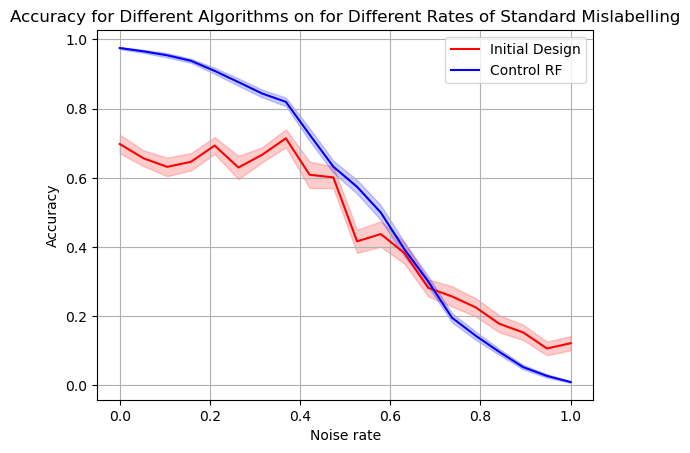

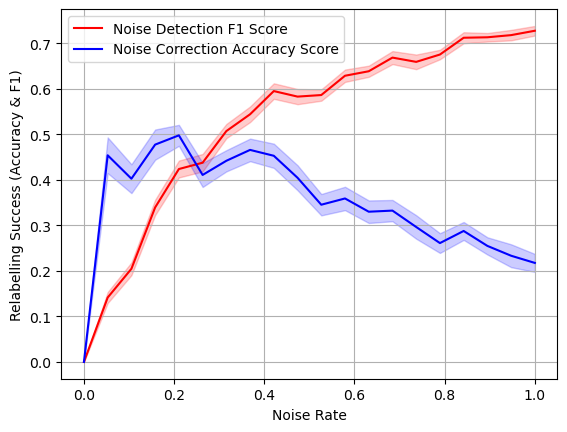

In [3]:
RESOLUTION = 20
TRIALS = 35
N_ESTIMATORS = 20
TEST_SIZE = 0.25

accuracies_all, relabelling_f1_all, relabelling_acc_all, noise_levels = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=True)

accuracies_mean, accuracies_se, relabelling_f1_success, relabelling_f1_se, relabelling_acc_success, relabelling_acc_se, x_axis = process_experiment_results(accuracies_all, relabelling_f1_all, relabelling_acc_all, RESOLUTION, TEST_SIZE, len(data.target))

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Initial Design", color="red")
plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control RF", color="blue")

plt.xlabel("Noise rate")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Noise Detection F1 Score", color="red")
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Noise Correction Accuracy Score", color="blue")


plt.xlabel("Noise Rate")
plt.ylabel("Relabelling Success (Accuracy & F1)")
plt.legend()
plt.grid(True)
plt.show()

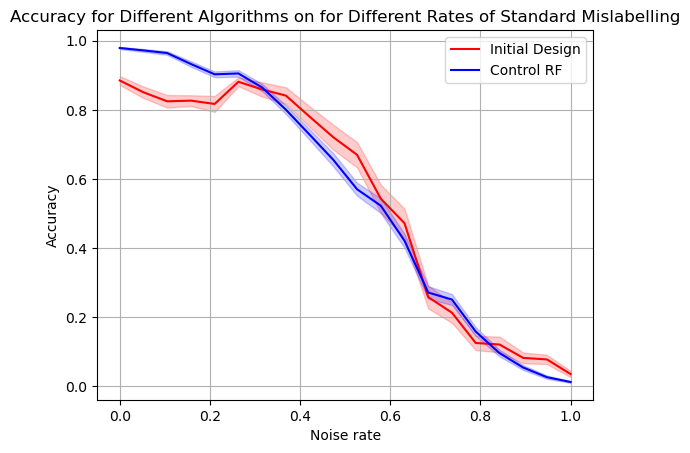

In [4]:
accuracies_all, relabelling_f1_all, relabelling_acc_all, noise_levels = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=False,
                                                                           bootstrap=True)

accuracies_mean, accuracies_se, relabelling_f1_success, relabelling_f1_se, relabelling_acc_success, relabelling_acc_se, x_axis = process_experiment_results(accuracies_all, relabelling_f1_all, relabelling_acc_all, RESOLUTION, TEST_SIZE, len(data.target))

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Initial Design", color="red")
plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control RF", color="blue")

plt.xlabel("Noise rate")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

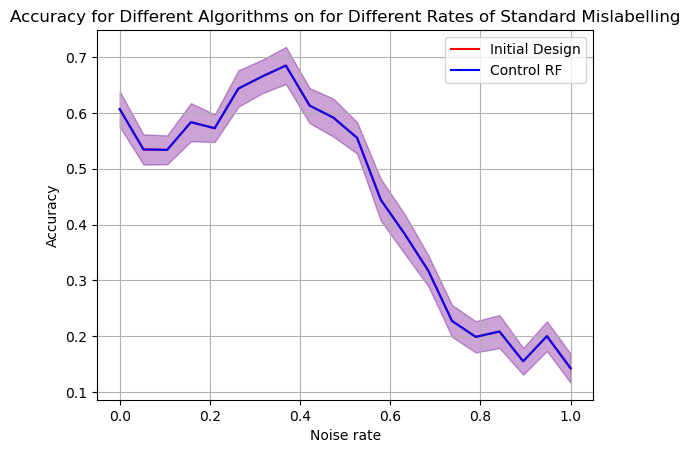

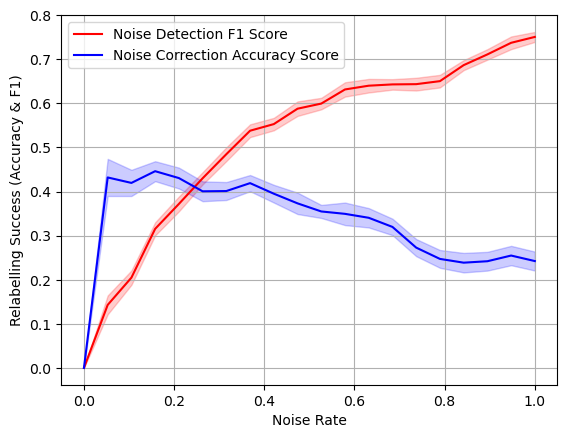

In [5]:
accuracies_all, relabelling_f1_all, relabelling_acc_all, noise_levels = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=False)

accuracies_mean, accuracies_se, relabelling_f1_success, relabelling_f1_se, relabelling_acc_success, relabelling_acc_se, x_axis = process_experiment_results(accuracies_all, relabelling_f1_all, relabelling_acc_all, RESOLUTION, TEST_SIZE, len(data.target))

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Initial Design", color="red")
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Control RF", color="blue")

plt.xlabel("Noise rate")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Noise Detection F1 Score", color="red")
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Noise Correction Accuracy Score", color="blue")


plt.xlabel("Noise Rate")
plt.ylabel("Relabelling Success (Accuracy & F1)")
plt.legend()
plt.grid(True)
plt.show()

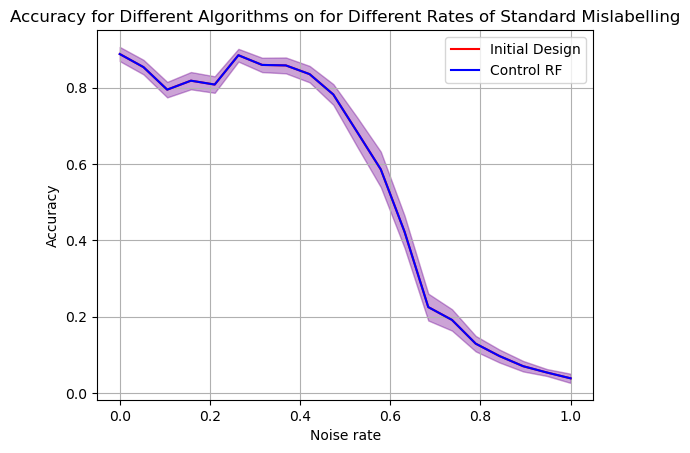

In [6]:
accuracies_all, relabelling_f1_all, relabelling_acc_all, noise_levels = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=False,
                                                                           bootstrap=False)

accuracies_mean, accuracies_se, relabelling_f1_success, relabelling_f1_se, relabelling_acc_success, relabelling_acc_se, x_axis = process_experiment_results(accuracies_all, relabelling_f1_all, relabelling_acc_all, RESOLUTION, TEST_SIZE, len(data.target))

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Initial Design", color="red")
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Control RF", color="blue")

plt.xlabel("Noise rate")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

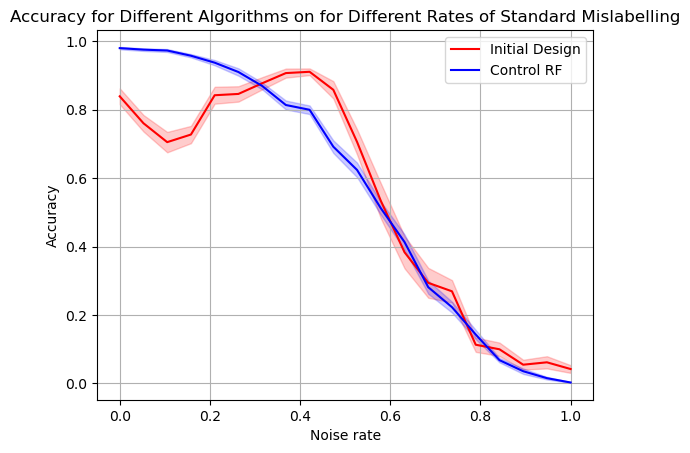

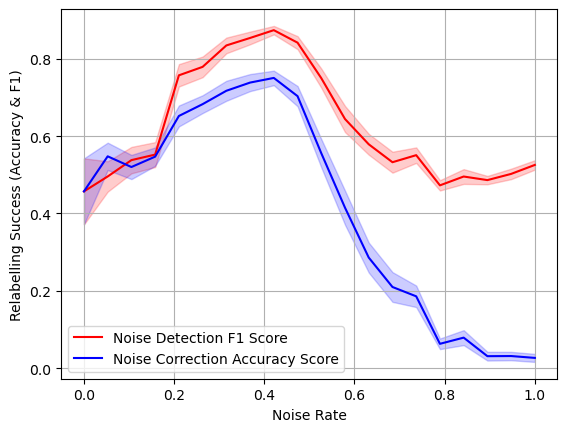

In [7]:
N_ESTIMATORS = 50

accuracies_all, relabelling_f1_all, relabelling_acc_all, noise_levels = run_relabelling_experiment(data,
                                                                           RandomForestClassifier,
                                                                           symmetric_noise,
                                                                           n_estimators=N_ESTIMATORS,
                                                                           trials=TRIALS,
                                                                           resolution=RESOLUTION,
                                                                           test_size=TEST_SIZE,
                                                                           relabelling=True,
                                                                           bootstrap=False,
                                                                           relabel_bunch=5)

accuracies_mean, accuracies_se, relabelling_f1_success, relabelling_f1_se, relabelling_acc_success, relabelling_acc_se, x_axis = process_experiment_results(accuracies_all, relabelling_f1_all, relabelling_acc_all, RESOLUTION, TEST_SIZE, len(data.target))

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Initial Design", color="red")
plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control RF", color="blue")

plt.xlabel("Noise rate")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Algorithms on for Different Rates of Standard Mislabelling")
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Noise Detection F1 Score", color="red")
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Noise Correction Accuracy Score", color="blue")


plt.xlabel("Noise Rate")
plt.ylabel("Relabelling Success (Accuracy & F1)")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
from scipy.stats import sem

for i in range(1, 11):
    accuracies_all, relabelling_f1_all, relabelling_acc_all, noise_levels = run_relabelling_experiment(data,
                                                                            RandomForestClassifier,
                                                                            symmetric_noise,
                                                                            n_estimators=N_ESTIMATORS,
                                                                            trials=TRIALS,
                                                                            methods = 'standard',
                                                                            resolution=RESOLUTION,
                                                                            test_size=TEST_SIZE,
                                                                            relabelling=True,
                                                                            bootstrap=False,
                                                                            relabel_bunch=i)

    # Calculate mean and standard deviation
    f1_mean = relabelling_f1_all.mean()
    f1_std = relabelling_f1_all.std()

    acc_mean = relabelling_acc_all.mean()
    acc_std = relabelling_acc_all.std()

    print(f"Relabel Bunch = {i}")
    print(f"F1 Mean: {f1_mean:.4f}, Std: {f1_std:.4f}")
    print(f"Accuracy Mean: {acc_mean:.4f}, Std: {acc_std:.4f}\n")

Relabel Bunch = 1
F1 Mean: 0.2554, Std: 0.3045
Accuracy Mean: 0.1599, Std: 0.1807

Relabel Bunch = 2
F1 Mean: 0.2569, Std: 0.3044
Accuracy Mean: 0.1629, Std: 0.1910

Relabel Bunch = 3
F1 Mean: 0.2647, Std: 0.3088
Accuracy Mean: 0.1709, Std: 0.2442

Relabel Bunch = 4
F1 Mean: 0.2919, Std: 0.3367
Accuracy Mean: 0.1939, Std: 0.2937

Relabel Bunch = 5
F1 Mean: 0.3118, Std: 0.3520
Accuracy Mean: 0.2062, Std: 0.3064

Relabel Bunch = 6
F1 Mean: 0.2975, Std: 0.3366
Accuracy Mean: 0.1817, Std: 0.2842

Relabel Bunch = 7
F1 Mean: 0.2628, Std: 0.3139
Accuracy Mean: 0.1570, Std: 0.2631

Relabel Bunch = 8
F1 Mean: 0.1915, Std: 0.2746
Accuracy Mean: 0.1123, Std: 0.2294

Relabel Bunch = 9
F1 Mean: 0.0934, Std: 0.2002
Accuracy Mean: 0.0581, Std: 0.1755

Relabel Bunch = 10
F1 Mean: 0.0943, Std: 0.2003
Accuracy Mean: 0.0584, Std: 0.1749



In [9]:
n_samples = len(data.data)

dt = DecisionTreeClassifier(max_depth=3)
for _ in range(50):
    clean_observed_certainty = [[], [], []]
    noisy_observed_certainty = [[], [], []]
    noisy_true_certainty = [[], [], []]

    indices = np.random.choice(n_samples, size=n_samples, replace=True)

    y_train = np.copy(data.target)
    y_mislabelled = symmetric_noise(y_train, 0.4)
    mislabel_mask = y_mislabelled != data.target

    X_boot = data.data[indices]
    y_boot = y_mislabelled[indices]

    dt.fit(X_boot, y_boot)

    for i in range(n_samples):
        if mislabel_mask[i]:
            noisy_observed_certainty[i in indices].append(dt.predict_proba([data.data[i]])[0][y_mislabelled[i]])
            noisy_true_certainty[i in indices].append(dt.predict_proba([data.data[i]])[0][data.target[i]])
        else:
            clean_observed_certainty[i in indices].append(dt.predict_proba([data.data[i]])[0][data.target[i]])

for _ in range(50):
    dt.fit(data.data, data.target)

    for i in range(n_samples):
        if mislabel_mask[i]:
            noisy_observed_certainty[2].append(dt.predict_proba([data.data[i]])[0][data.target[i]])
            noisy_true_certainty[2].append(dt.predict_proba([data.data[i]])[0][y_mislabelled[i]])
        else:
            clean_observed_certainty[2].append(dt.predict_proba([data.data[i]])[0][data.target[i]])

print("Included")
print(f"Noisy Observed Label Certainty: {np.mean(noisy_observed_certainty[1]):.4f}; std = {np.std(noisy_observed_certainty[1]):.4f}")
print(f"Noisy True Label Certainty: {np.mean(noisy_true_certainty[1]):.4f}; std = {np.std(noisy_true_certainty[1]):.4f}")
print(f"Clean Label Certainty: {np.mean(clean_observed_certainty[1]):.4f}; std = {np.std(clean_observed_certainty[1]):.4f}")

print("\nExcluded")
print(f"Noisy Observed Label Certainty: {np.mean(noisy_observed_certainty[0]):.4f}; std = {np.std(noisy_observed_certainty[0]):.4f}")
print(f"Noisy True Label Certainty: {np.mean(noisy_true_certainty[0]):.4f}; std = {np.std(noisy_true_certainty[0]):.4f}")
print(f"Clean Label Certainty: {np.mean(clean_observed_certainty[0]):.4f}; std = {np.std(clean_observed_certainty[0]):.4f}")

print("\nNon-Bootstrapped")
print(f"Noisy Observed Label Certainty: {np.mean(noisy_observed_certainty[2]):.4f}; std = {np.std(noisy_observed_certainty[2]):.4f}")
print(f"Noisy True Label Certainty: {np.mean(noisy_true_certainty[2]):.4f}; std = {np.std(noisy_true_certainty[2]):.4f}")
print(f"Clean Label Certainty: {np.mean(clean_observed_certainty[2]):.4f}; std = {np.std(clean_observed_certainty[2]):.4f}")

Included
Noisy Observed Label Certainty: 0.3323; std = 0.1955
Noisy True Label Certainty: 0.4139; std = 0.2517
Clean Label Certainty: 0.7102; std = 0.2574

Excluded
Noisy Observed Label Certainty: 0.2446; std = 0.1791
Noisy True Label Certainty: 0.5012; std = 0.3121
Clean Label Certainty: 0.5360; std = 0.2694

Non-Bootstrapped
Noisy Observed Label Certainty: 0.9492; std = 0.1568
Noisy True Label Certainty: 0.0247; std = 0.1128
Clean Label Certainty: 0.9641; std = 0.1241
